In [86]:
#import modules and set parameters
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

from sklearn import decomposition
from sklearn.cross_validation import cross_val_score

data = pd.read_csv('C:\Users\Tolu\Documents\World\diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [87]:
#check the shape of the data
data.shape

(768, 9)

In [5]:
#generate data quality report
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#check for nulls
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
#It does not make intuitive sense to have '0' value for 'Glocose', 'BloodPressure', 'SkinThickness, 'Insulin' and 'BMI'. 
#replace the '0' values in these columns with the mean values for the columns
zero_fields = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[zero_fields] = data[zero_fields].replace(0, np.nan) 
data[zero_fields] = data[zero_fields].fillna(data.mean())

In [8]:
#confirm '0s' have been replaced
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [137]:
#define x and y
X = data.iloc[:,0:8]
y = data.iloc[:,8]

In [138]:
#extract the best 5 features using chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data_top_5 = SelectKBest(score_func=chi2, k = 5)
fit = data_top_5.fit(X,y)
features = fit.transform(X)

In [139]:
features[0:5]

array([[   6. ,  148. ,    0. ,   33.6,   50. ],
       [   1. ,   85. ,    0. ,   26.6,   31. ],
       [   8. ,  183. ,    0. ,   23.3,   32. ],
       [   1. ,   89. ,   94. ,   28.1,   21. ],
       [   0. ,  137. ,  168. ,   43.1,   33. ]])

In [12]:
data.head()
#top 5 feature based on chi2 are 'Pregnancies', 'Glucose', 'Insulin', 'BMI', and 'Age',  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [13]:
#create a new DataFrame with only the top 5 features
X_featured = pd.DataFrame(data = features, columns = ['Pregnancies','Glucose','Insulin', 'BMI', 'Age'])
X_featured.head()

,Pregnancies,Glucose,Insulin,BMI,Age
0,6.0,148.0,155.548223,33.6,50.0
1,1.0,85.0,155.548223,26.6,31.0
2,8.0,183.0,155.548223,23.3,32.0
3,1.0,89.0,94.000000,28.1,21.0
4,0.0,137.0,168.000000,43.1,33.0


In [140]:
#normalize data to enable the algorithm build the model
from sklearn.preprocessing import StandardScaler
rescaledX = StandardScaler().fit_transform(X_featured)
X = pd.DataFrame(data = rescaledX, columns= X_featured.columns)

In [141]:
#build Logistic Regression model with the 5 features and determine accuracy
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
scores_logreg = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
print scores_logreg.mean()

0.770847573479


In [142]:
#build K-NN model (k=5) with the 5 features and determine accuracy
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
scores_knn = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print scores_knn.mean()

0.743386876282


In [20]:
#develop model using PCA
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [35]:
#use PCA for Dimensionality Reduction/Feature Selection

#Define X and y
X_pca7 = data.iloc[:,0:8]
y_pca7 = data.iloc[:,8]

In [36]:
#import PCA package & transform data
#create 7 components
from sklearn import decomposition
pca7 = decomposition.PCA(n_components=7)
X_trf_7 = pca7.fit_transform(X_pca7)

In [143]:
#determine percentage of variance explained by the 7 comonents
pca7.explained_variance_ratio_.sum()

0.99998775994400024

In [144]:
#create 6 components
pca6 = decomposition.PCA(n_components=6)
X_trf_6 = pca6.fit_transform(X_pca7)

In [145]:
#determine percentage of variance explained by the 6 comonents
pca6.explained_variance_ratio_.sum()

0.99908173788182386

In [43]:
#create 5 components
pca5 = decomposition.PCA(n_components=5)
X_trf_5 = pca5.fit_transform(X_pca7)

0.99622647150660171

In [146]:
#determine percentage of variance explained by the 5 comonents
pca5.explained_variance_ratio_.sum()

0.99622647150660126

In [147]:
#create 2 components
pca2 = decomposition.PCA(n_components=2)
X_trf_2 = pca2.fit_transform(X_pca7)

In [148]:
#determine percentage of variance explained by the 2 comonents
pca2.explained_variance_ratio_.sum()

0.95423747831937178

In [149]:
#create 4 components
pca4 = decomposition.PCA(n_components=4)
X_trf_4 = pca4.fit_transform(X_pca7)

In [150]:
#determine percentage of variance explained by the 4 comonents
pca4.explained_variance_ratio_.sum()

0.98695573126246849

explained variance ratio (all 8 components):  [  8.65102675e-01   8.91348033e-02   2.03983318e-02   1.23199212e-02
   9.27074024e-03   2.85526638e-03   9.06022062e-04   1.22400560e-05]
sum of explained variance ratio (all 4 components):  1.0


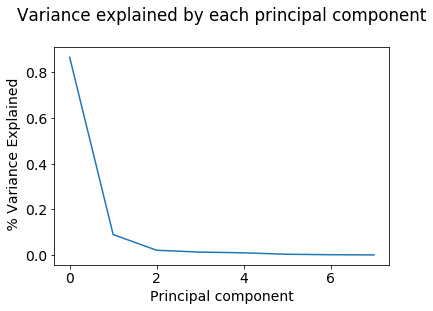

In [57]:
#Choosing components
pca8 = decomposition.PCA(n_components=8)
X_trf_8 = pca8.fit_transform(X_pca7)

print 'explained variance ratio (all 8 components): ', pca8.explained_variance_ratio_
print 'sum of explained variance ratio (all 4 components): ', pca8.explained_variance_ratio_.sum()

plt.cla()
plt.plot(pca8.explained_variance_ratio_)
plt.title('Variance explained by each principal component\n')
plt.ylabel(' % Variance Explained')
plt.xlabel('Principal component')

In [58]:
#use 6 components to build the model & obtain accuracy score
from sklearn.pipeline import Pipeline
pipe_trf_6 = Pipeline([('pca_6', decomposition.PCA(n_components=6)),
                 ('logistic', LogisticRegression())])
scores_trf_6 = cross_val_score(pipe_trf_6, X_trf_6, y, cv=10, scoring='accuracy')
scores_trf_6.mean()

0.76960013670539995

In [59]:
#use 5 components to build the model & obtain accuracy score
from sklearn.pipeline import Pipeline
pipe_trf_5 = Pipeline([('pca_5', decomposition.PCA(n_components=5)),
                 ('logistic', LogisticRegression())])
scores_trf_5 = cross_val_score(pipe_trf_5, X_trf_5, y, cv=10, scoring='accuracy')
scores_trf_5.mean()

0.75531442241968549

In [61]:
#use 2 components to build the model & obtain accuracy score
from sklearn.pipeline import Pipeline
pipe_trf_2 = Pipeline([('pca_2', decomposition.PCA(n_components=2)),
                 ('logistic', LogisticRegression())])
scores_trf_2 = cross_val_score(pipe_trf_2, X_trf_2, y, cv=10, scoring='accuracy')
scores_trf_2.mean()

0.74620642515379365

In [68]:
#use 4 components to build the model & obtain accuracy score
from sklearn.pipeline import Pipeline
pipe_trf_4 = Pipeline([('pca_4', decomposition.PCA(n_components=4)),
                 ('logistic', LogisticRegression())])
scores_trf_4 = cross_val_score(pipe_trf_4, X_trf_4, y, cv=10, scoring='accuracy')
scores_trf_4.mean()

0.74224196855775815

In [155]:
#print accuracy score of the various models to make comparison
print 'log_5_chi2:', scores_logreg.mean(),'\n'*2, 'knn_5_chi2:', scores_knn.mean(),'\n'*2, 'log_6_pca:', scores_trf_6.mean(), '\n'*2, 'log_5_pca:', scores_trf_5.mean(), '\n'*2, 'log_4_pca:', scores_trf_4.mean()

log_5_chi2: 0.770847573479 

knn_5_chi2: 0.743386876282 

log_6_pca: 0.769600136705 

log_5_pca: 0.75531442242 

log_4_pca: 0.742241968558


In [157]:
#The best performing model (77.08%) is the Logistic Regression Model using the 5 Best Features as Determined by chi2
#5 best feature = 'Pregnancies','Glucose','Insulin', 'BMI', & 'Age'

In [160]:
#perform null accuracy
#show distribution of target feature
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [162]:
y.value_counts().head(1) / len(y)

0    0.651042
Name: Outcome, dtype: float64

In [ ]:
#selected model performs 12% more than null accuracy